In [1]:
from algorithm.louvain import louvain
from algorithm.spectral_clustering import spectral_clustering, normalized_spectral_clustering
from algorithm.hierarchical_clustering import mst_cut_clustering
from utils.analyze import get_rs_from_fixed_weighted_degree, compute_clustering, validation, metrics_to_df 
from utils.generation import multivariate_t_rvs

from scipy import stats
import pandas as pd
import numpy as np

# Experiment with Student sampling
Degree of freedom is 3. 

Considering graph of 40 vertices: 2 clusters of size 20.  
Weighted average degree is fixed with value 16.  
r_out is from $0$ to $r_{out_{max}}$.

In [2]:
rs = get_rs_from_fixed_weighted_degree(degree=16, cluster_size= 20, num_clusters=2,r_out_bound = (0,1,100))

In [ ]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 40,
    num_repeats=200,
    corr_estimator=stats.pearsonr, 
    distribution = multivariate_t_rvs,
    **{'df':3})


100%|██████████| 4/4 [00:40<00:00, 10.06s/it]


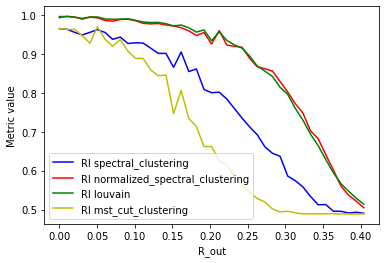

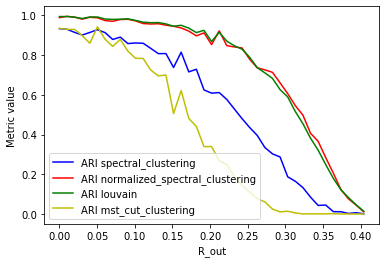

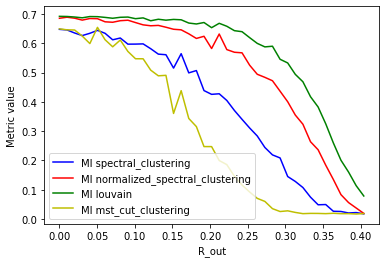

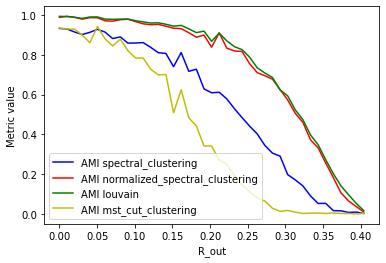

In [4]:
metrics40 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df40 = metrics_to_df(metrics40, rs)
df40.to_csv('student3_graph_40_degree16_sample_40_repeates200')

In [ ]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 80,
    num_repeats=200,
    corr_estimator=stats.pearsonr, 
    distribution = multivariate_t_rvs,
    **{'df':3})


100%|██████████| 4/4 [00:40<00:00, 10.13s/it]


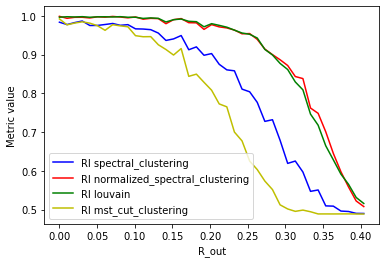

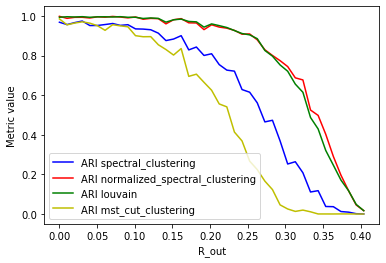

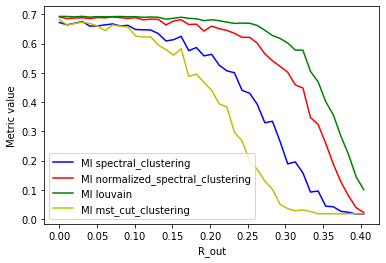

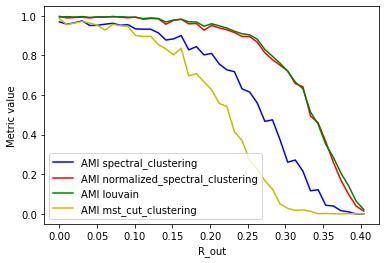

In [6]:
metrics80 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df80 = metrics_to_df(metrics80, rs)
df80.to_csv('student3_graph_40_degree16_sample_80_repeates400')

In [ ]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 400,
    num_repeats=200,
    corr_estimator=stats.pearsonr, 
    distribution = multivariate_t_rvs,
    **{'df':3})


100%|██████████| 4/4 [00:40<00:00, 10.01s/it]


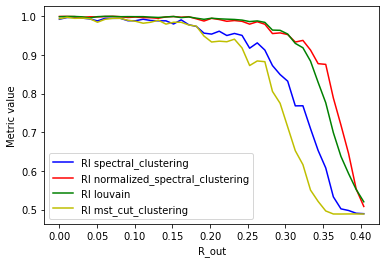

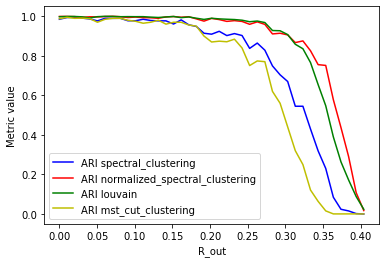

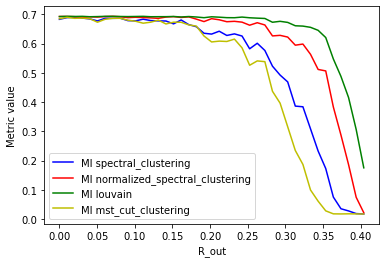

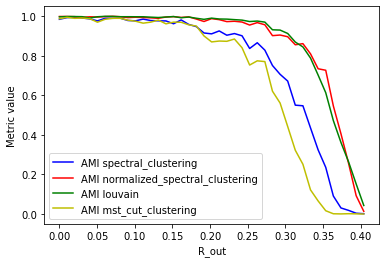

In [8]:
metrics400 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df400 = metrics_to_df(metrics400, rs)
df400.to_csv('student3_graph_degree16_sample_400_repeates400')

# Comparison student and normal

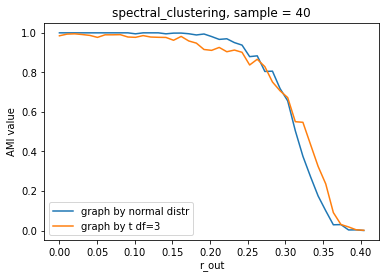

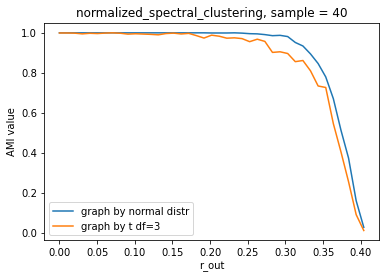

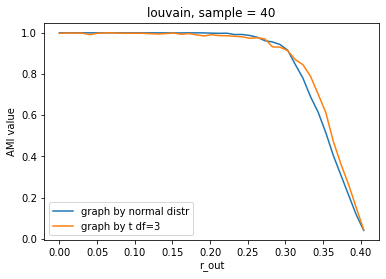

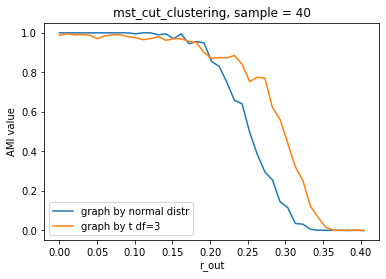

In [9]:
df40n = pd.read_csv('cached_results/graph_40_degree16_sample_40_repeates400',header=[0, 1], index_col=0 )
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], df40n[algo][metric].values, df400[algo][metric].values)), columns = ['r_out', 'graph by normal distr', 'graph by t df=3']).set_index(['r_out'])
    df.plot(title=algo + ', sample = 40', ylabel = metric + ' value')

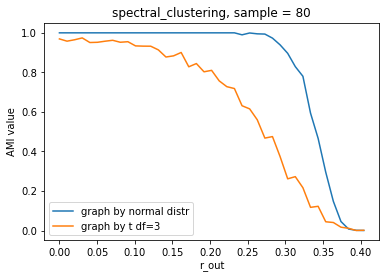

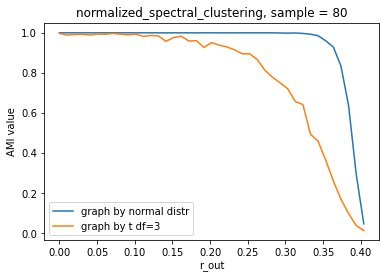

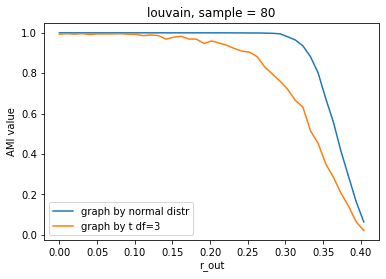

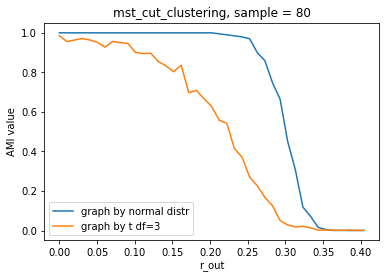

In [10]:
df80n = pd.read_csv('cached_results/graph_40_degree16_sample_80_repeates400',header=[0, 1], index_col=0 )
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], df80n[algo][metric].values, df80[algo][metric].values)), columns = ['r_out', 'graph by normal distr', 'graph by t df=3']).set_index(['r_out'])
    df.plot(title=algo + ', sample = 80', ylabel = metric + ' value')

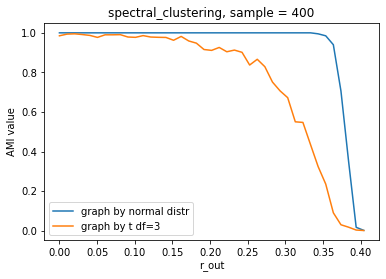

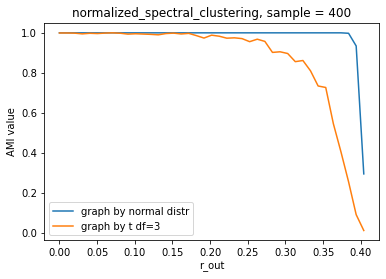

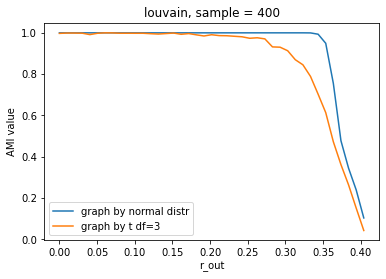

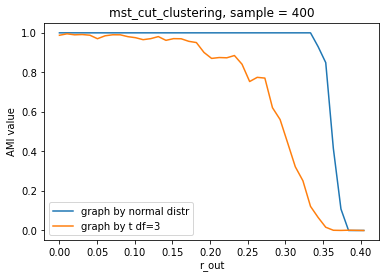

In [11]:
df400n = pd.read_csv('cached_results/graph_degree16_sample_400_repeates400',header=[0, 1], index_col=0 )
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], df400n[algo][metric].values, df400[algo][metric].values)), columns = ['r_out', 'graph by normal distr', 'graph by t df=3']).set_index(['r_out'])
    df.plot(title=algo + ', sample = 400', ylabel = metric + ' value')

# Comparison student with degree 2 and 3

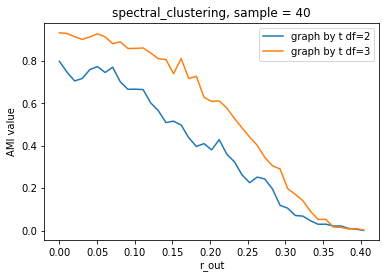

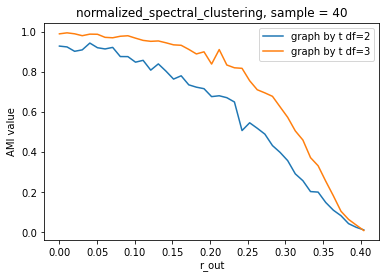

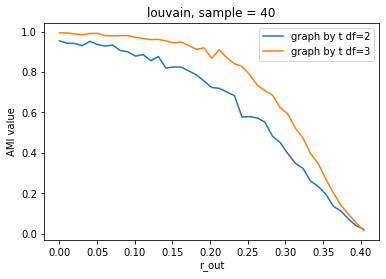

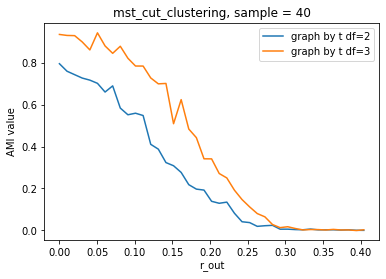

In [16]:
df40t2 = pd.read_csv('student2_graph_40_degree16_sample_40_repeates200',header=[0, 1], index_col=0 )
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], df40t2[algo][metric].values, df40[algo][metric].values)), columns = ['r_out', 'graph by t df=2', 'graph by t df=3']).set_index(['r_out'])
    df.plot(title=algo + ', sample = 40', ylabel = metric + ' value')

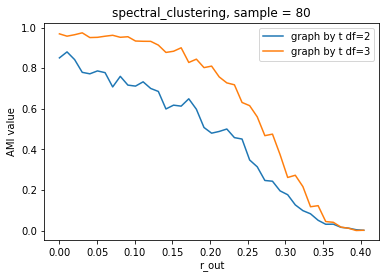

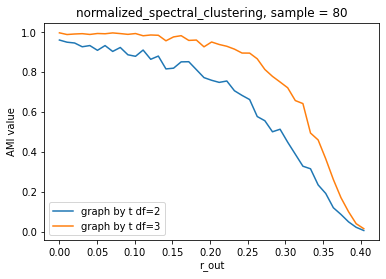

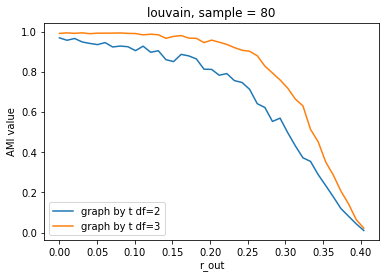

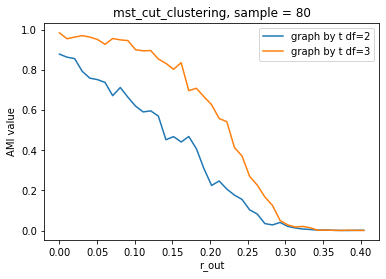

In [17]:
df80t2 = pd.read_csv('student2_graph_40_degree16_sample_80_repeates400',header=[0, 1], index_col=0 )
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], df80t2[algo][metric].values, df80[algo][metric].values)), columns = ['r_out', 'graph by t df=2', 'graph by t df=3']).set_index(['r_out'])
    df.plot(title=algo + ', sample = 80', ylabel = metric + ' value')

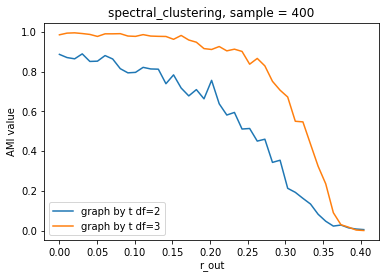

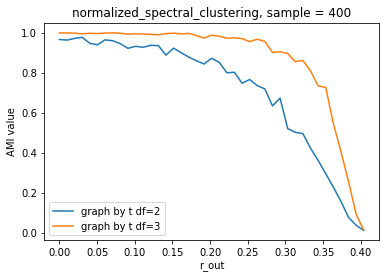

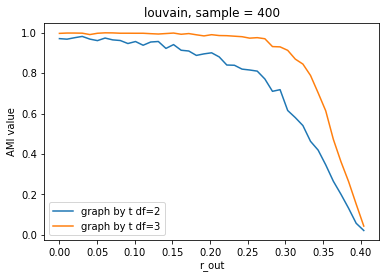

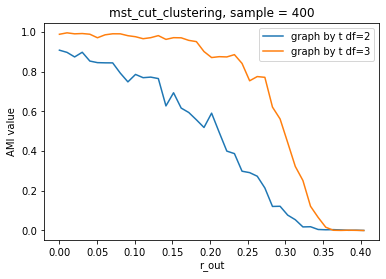

In [20]:
df400t2 = pd.read_csv('student2_graph_degree16_sample_400_repeates400',header=[0, 1], index_col=0 )
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], df400t2[algo][metric].values, df400[algo][metric].values)), columns = ['r_out', 'graph by t df=2', 'graph by t df=3']).set_index(['r_out'])
    df.plot(title=algo + ', sample = 400', ylabel = metric + ' value')